# EDA on Adult dataset

## About the dataset:
This dataset comes from the UCI repository of machine learning databases. The task is to predict if an individual's annual income excceds $50,000 based on census data.

In [30]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Fields
The dataset contains 16 columns
##### Target filed: Income
-- The income is divide into two classes: 50K
##### Number of attributes: 14
-- These are the demographics and other features to describe a person

In [31]:
#reading the csv file and creating the dataframe
df = pd.read_csv("adult.csv")
print(df)


       age         workclass  fnlwgt     education  educational-num  \
0       25           Private  226802          11th                7   
1       38           Private   89814       HS-grad                9   
2       28         Local-gov  336951    Assoc-acdm               12   
3       44           Private  160323  Some-college               10   
4       18                 ?  103497  Some-college               10   
5       34           Private  198693          10th                6   
6       29                 ?  227026       HS-grad                9   
7       63  Self-emp-not-inc  104626   Prof-school               15   
8       24           Private  369667  Some-college               10   
9       55           Private  104996       7th-8th                4   
10      65           Private  184454       HS-grad                9   
11      36       Federal-gov  212465     Bachelors               13   
12      26           Private   82091       HS-grad                9   
13    

In [32]:
df.shape


(48842, 15)

##### Attributes:

In [33]:
df.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

#### Data cleaning and preprocessing

In [34]:
#Fixing the empty values represented by "?" in dataset
freq = df["workclass"].value_counts().idxmax()
df.loc[df["workclass"] == "?", "workclass"] =freq

freq = df["occupation"].value_counts().idxmax()
df.loc[df["occupation"] == "?", "occupation"] =freq

freq = df["native-country"].value_counts().idxmax()
df.loc[df["native-country"] == "?", "native-country"] =freq
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


### Description of categorical attributes:

In [35]:
#Summary of categorical data
df.describe(include=["O"])


,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


### Description of numerical attributes:

In [36]:
#summary of numerical data
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


## Univariate Analysis:

### Attribute "age":
#### Distrbution plot:

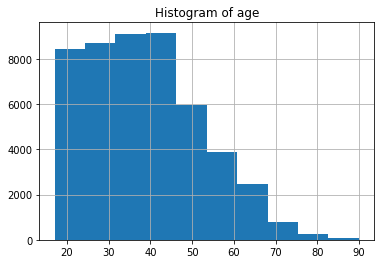

In [38]:
df.age.hist().set_title("Histogram of age")
plt.show()

### Attribute "fnlwgt"(i.e. final weight):
#### Distrbution plot:

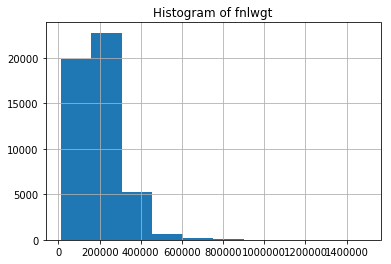

In [39]:
df.fnlwgt.hist().set_title("Histogram of fnlwgt")
plt.show()

### Attribute "educational-num":
#### Distrbution plot:

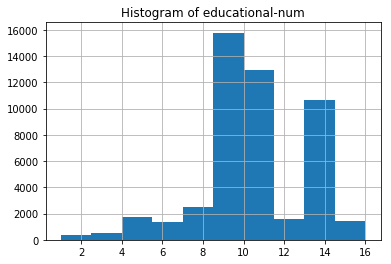

In [40]:
df["educational-num"].hist().set_title("Histogram of educational-num")
plt.show()

### Attribute "capital-gain":
#### Distrbution plot:

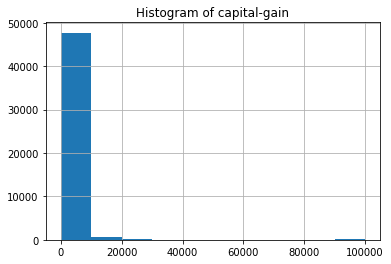

In [41]:
df["capital-gain"].hist().set_title("Histogram of capital-gain")
plt.show()

### Attribute "capital-loss":
#### Distrbution plot:

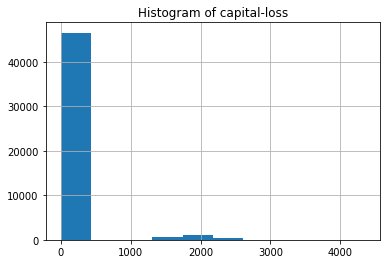

In [42]:
df["capital-loss"].hist().set_title("Histogram of capital-loss")
plt.show()

### Attribute "hours-per-week":
#### Distrbution plot:

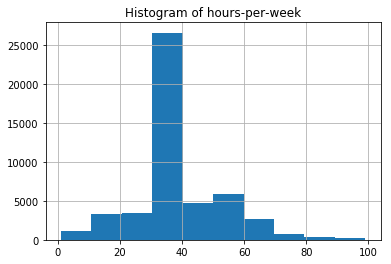

In [43]:
df["hours-per-week"].hist().set_title("Histogram of hours-per-week")
plt.show()

### Attribute "workclass":
#### Distrbution plot:

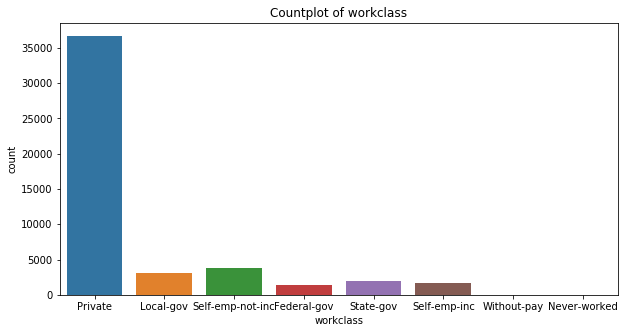

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='workclass',data=df)
plt.title("Countplot of workclass")
plt.show()

### Attribute "education":
#### Distrbution plot:

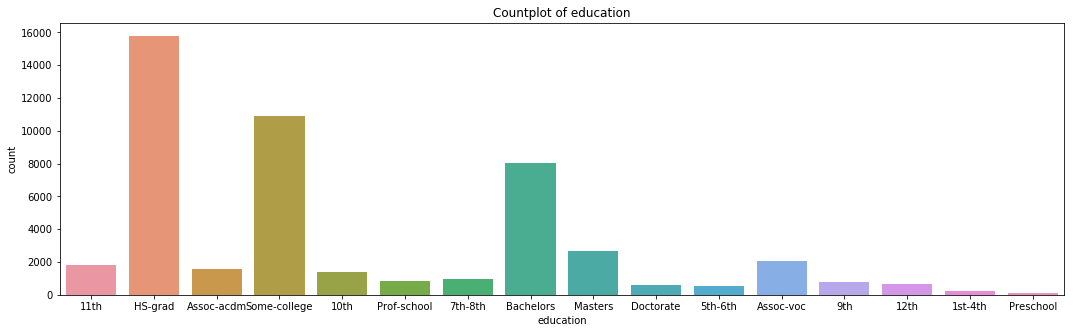

In [45]:
plt.figure(figsize=(18,5))
sns.countplot(x='education',data=df)
plt.title("Countplot of education")
plt.show()

### Attribute "marital-status":
#### Distrbution plot:

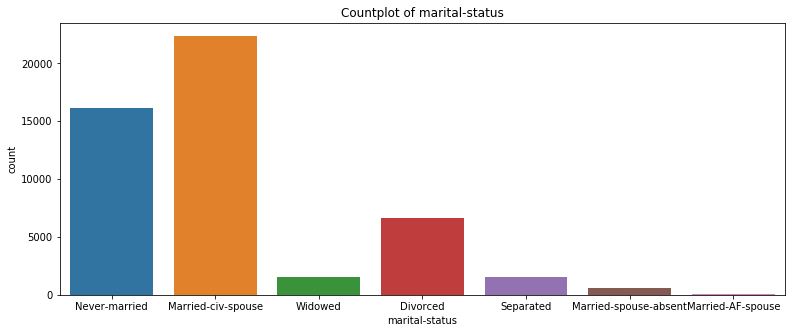

In [46]:
plt.figure(figsize=(13,5))
sns.countplot(x='marital-status',data=df)
plt.title("Countplot of marital-status")
plt.show()

### Attribute "occupation":
#### Distrbution plot:

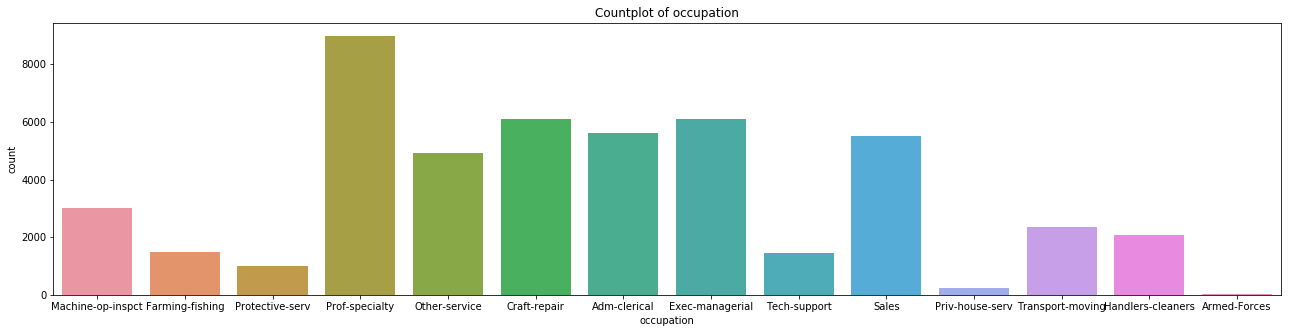

In [47]:
plt.figure(figsize=(22,5))
sns.countplot(x='occupation',data=df)
plt.title("Countplot of occupation")
plt.show()

### Attribute "relationship":
#### Distrbution plot:

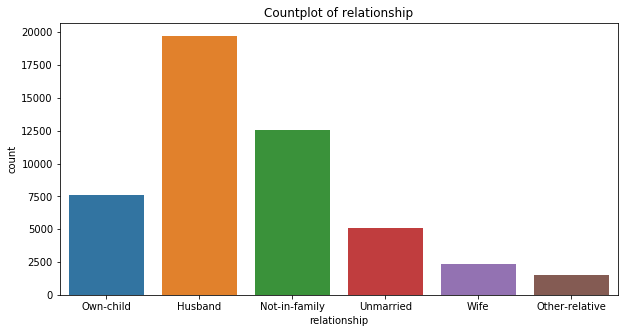

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='relationship',data=df)
plt.title("Countplot of relationship")
plt.show()

### Attribute "race":
#### Distrbution plot:

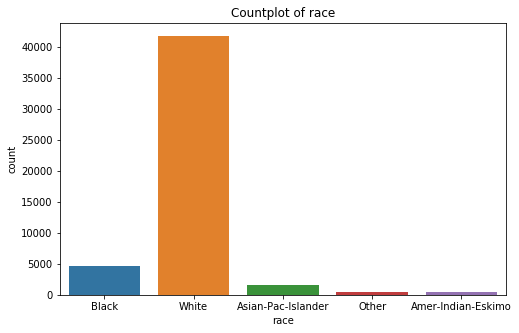

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='race',data=df)
plt.title("Countplot of race")
plt.show()

### Attribute "gender":
#### Distrbution plot:

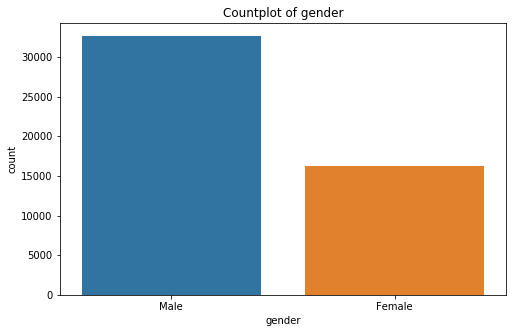

In [50]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender',data=df)
plt.title("Countplot of gender")
plt.show()

### Attribute "native-country":
#### Distrbution plot:

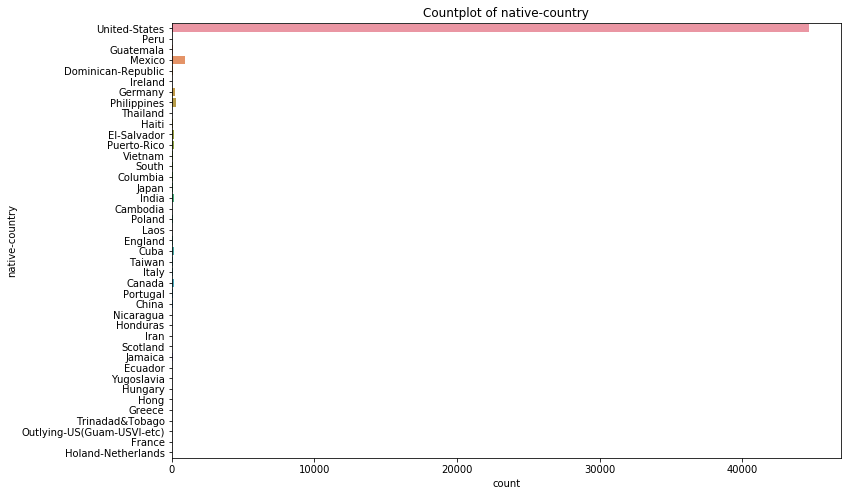

In [51]:
plt.figure(figsize=(12,8))
sns.countplot(y='native-country',data=df)
plt.title("Countplot of native-country")
plt.show()

### Attribute "income":
#### Distrbution plot:

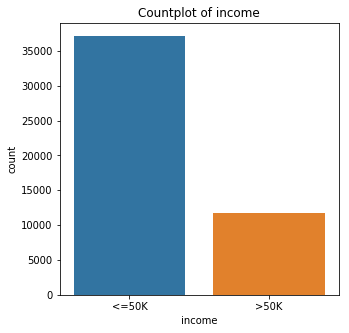

In [52]:
plt.figure(figsize=(5,5))
sns.countplot(x='income',data=df)
plt.title("Countplot of income")
plt.show()

## Bivariate Analysis

### Relationship between income and age attributes:

#### Boxplot for income vs age:

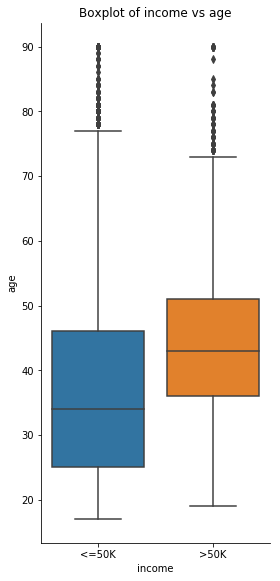

In [53]:
sns.catplot(x="income", y="age", data=df, kind ="box", height = 8, aspect=.5)
plt.title("Boxplot of income vs age")
plt.show()

### Relationship between income and educational-num attributes:

#### Boxplot for income vs educational-num

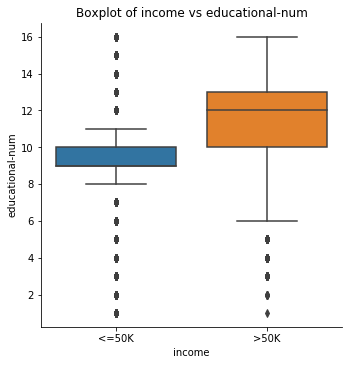

In [54]:
sns.catplot(x="income", y="educational-num", data=df, kind ="box")
plt.title("Boxplot of income vs educational-num")
plt.show()

### Relationship between income and capital-loss attributes:

#### Boxplot for income vs capital-loss

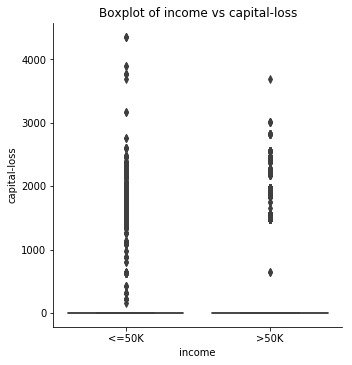

In [55]:
sns.catplot(x="income", y="capital-loss", data=df, kind ="box")
plt.title("Boxplot of income vs capital-loss")
plt.show()

### Relationship between income and capital-gain

#### Boxplot for income vs capital-gain

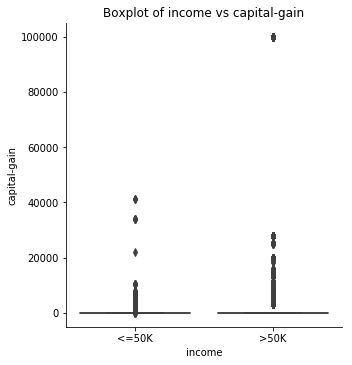

In [56]:
sns.catplot(x="income", y="capital-gain", data=df, kind ="box")
plt.title("Boxplot of income vs capital-gain")
plt.show()

### Relationship between income and hours-per-week:

#### Boxplot for income vs hours-per-week

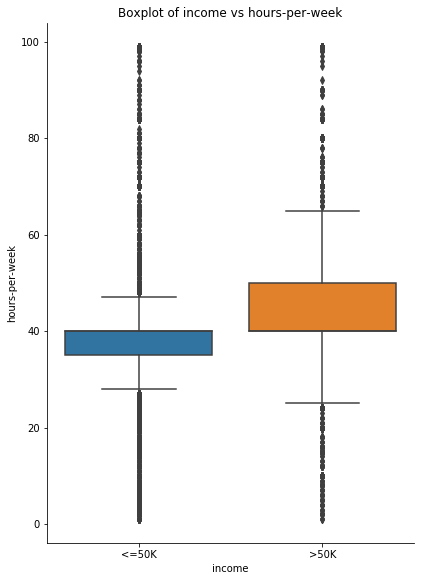

In [57]:
sns.catplot(x="income", y="hours-per-week", data=df, kind ="box", height=8,aspect=.75)
plt.title("Boxplot of income vs hours-per-week")
plt.show()

### Distribution of income types over various workclasses:

#### Countplot for workclass with hue as income

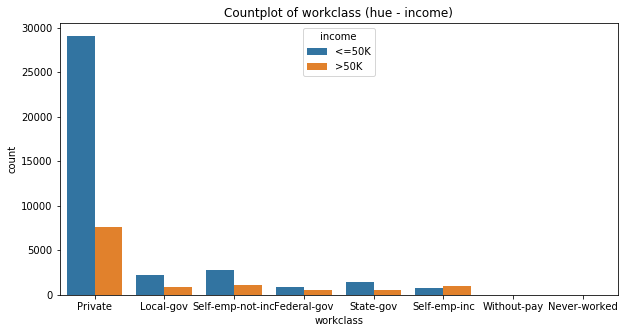

In [58]:
plt.figure(figsize=(10,5))
sns.countplot(x="workclass",hue='income',data=df)
plt.title("Countplot of workclass (hue - income)")
plt.show()

### Relationship between income and fnlwgt:

#### Boxplot for income vs fnlwgt

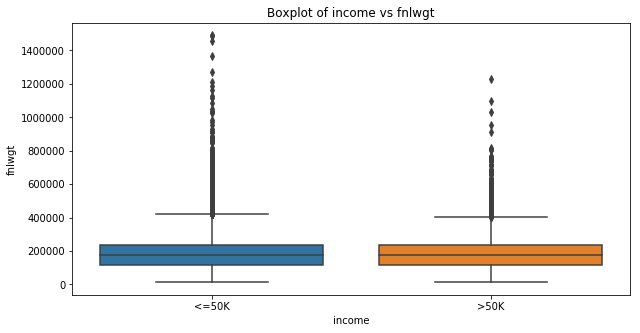

In [59]:
plt.figure(figsize=(10,5))
sns.boxplot(y="fnlwgt",x='income',data=df)
plt.title("Boxplot of income vs fnlwgt")
plt.show()

### Distribution of income types over various education-degrees:

#### Countplot for education with hue as income

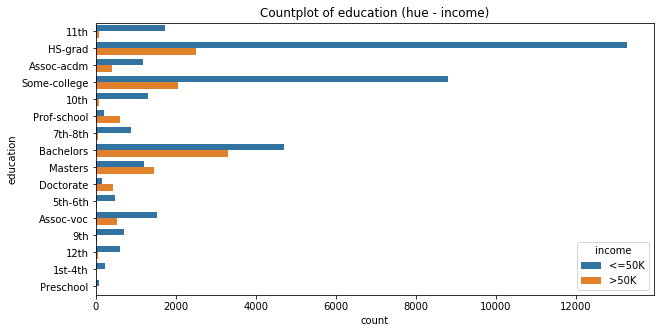

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(y="education",hue='income',data=df)
plt.title("Countplot of education (hue - income)")
plt.show()

### Distribution of income types over various marital-status:

#### Countplot for marital-status with hue as income

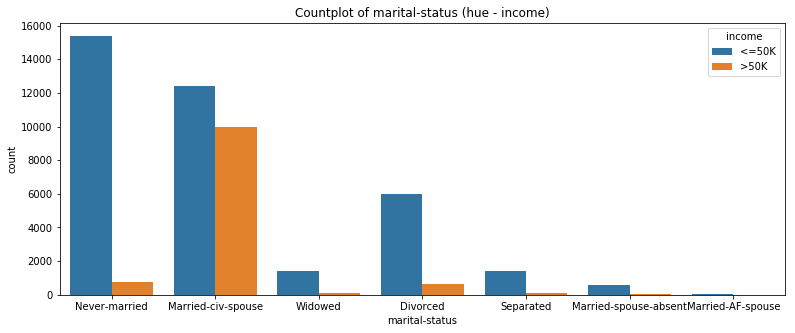

In [61]:
plt.figure(figsize=(13,5))
sns.countplot(x="marital-status",hue='income',data=df)
plt.title("Countplot of marital-status (hue - income)")
plt.show()

### Distribution of income types over various occupation:

#### Countplot for occupation with hue as income

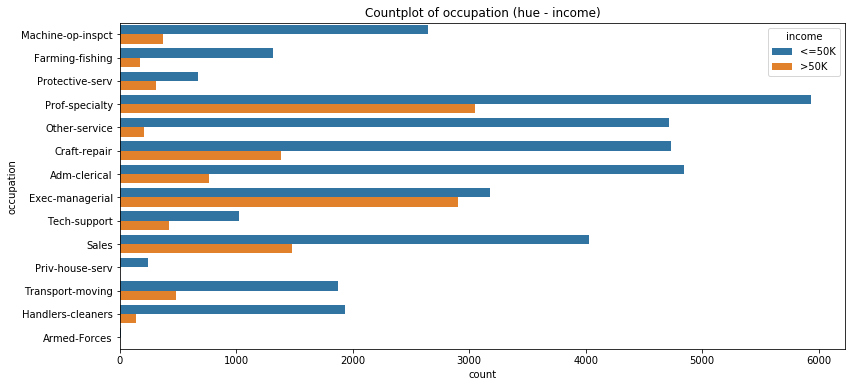

In [62]:
plt.figure(figsize=(13,6))
sns.countplot(y="occupation",hue='income',data=df)
plt.title("Countplot of occupation (hue - income)")
plt.show()

### Distribution of income types over various relationsip-types:

#### Countplot for relationship with hue as income

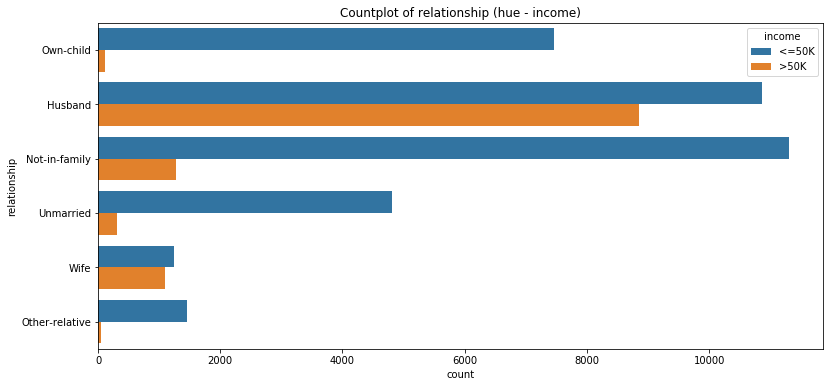

In [63]:
plt.figure(figsize=(13,6))
sns.countplot(y="relationship",hue='income',data=df)
plt.title("Countplot of relationship (hue - income)")
plt.show()

### Distribution of income types over various races:

#### Countplot for race with hue as income

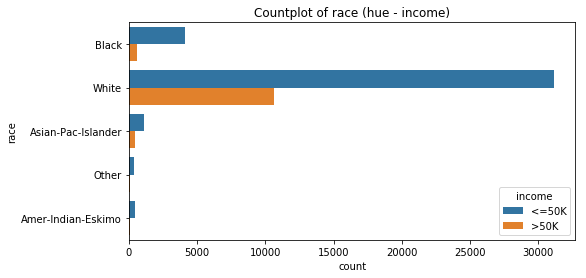

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(y="race",hue='income',data=df)
plt.title("Countplot of race (hue - income)")
plt.show()

### Distribution of income types over genders:

#### Countplot for gender with hue as income

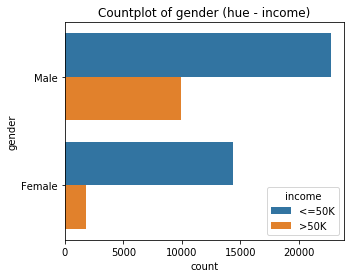

In [65]:
plt.figure(figsize=(5,4))
sns.countplot(y="gender",hue='income',data=df)
plt.title("Countplot of gender (hue - income)")
plt.show()

### Distribution of income types over various native-countries:

#### Countplot for native-country with hue as income

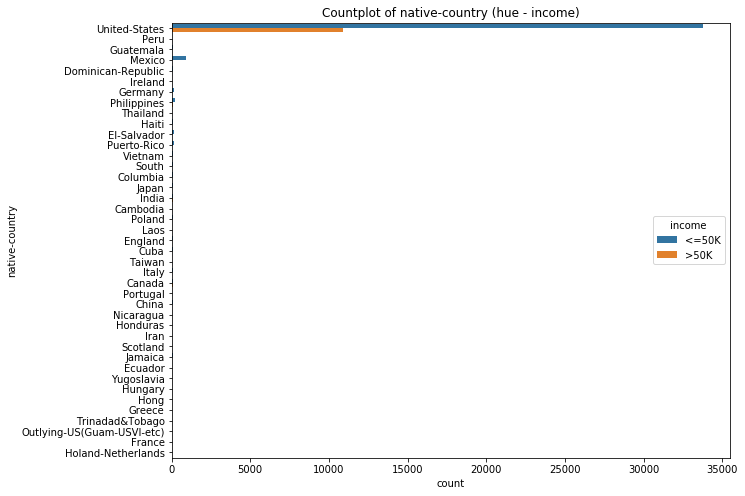

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(y="native-country",hue='income',data=df)
plt.title("Countplot of native-country (hue - income)")
plt.show()

## Multivariate analysis:

### Pairplot for all numerical attributes:

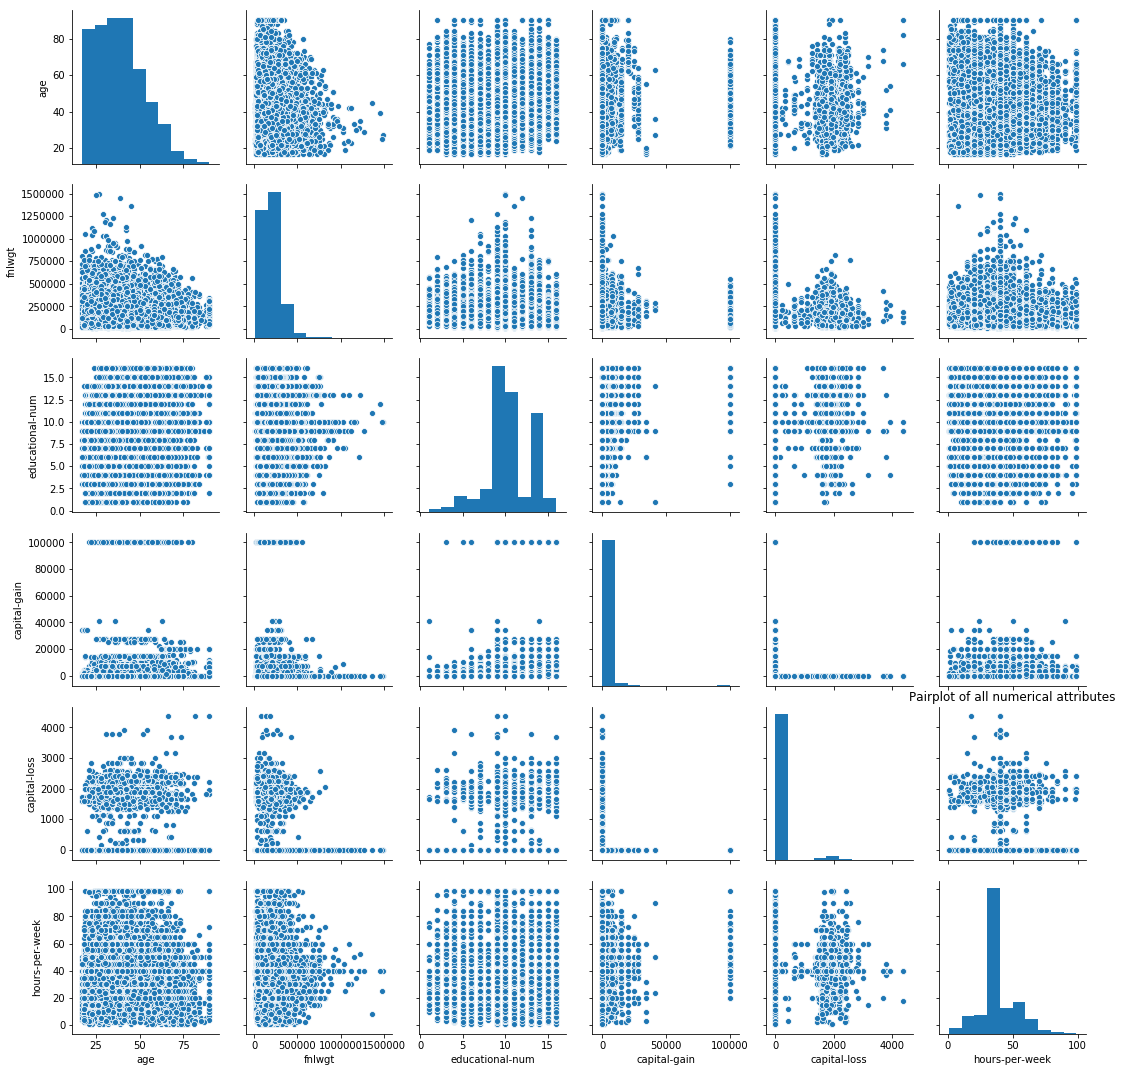

In [67]:
sns.pairplot(df)
plt.title("Pairplot of all numerical attributes")
plt.show()

### Correlation among numerical attributes:

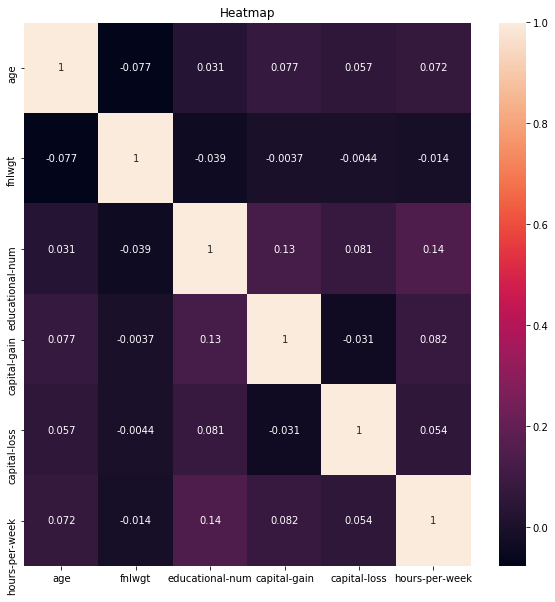

In [68]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)
plt.title("Heatmap")
plt.show()

### Boxplot for income vs hours-per-week (hue - gender):

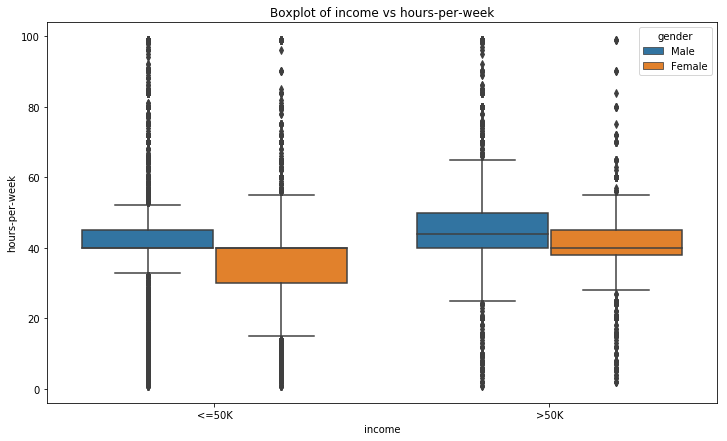

In [69]:
plt.figure(figsize=(12,7))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=df)
plt.title("Boxplot of income vs hours-per-week")
plt.show()

### Boxplot for income vs age (hue - gender):

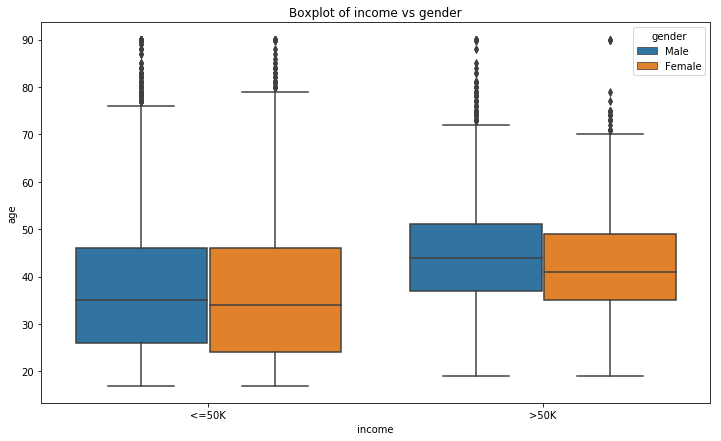

In [70]:
plt.figure(figsize=(12,7))
sns.boxplot(x='income',y ='age', hue='gender',data=df)
plt.title("Boxplot of income vs gender")
plt.show()